<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #8: Agrupación de textos


Daniel Alejandro Cárdenas Niño 616202006

In [36]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

# ! pip install plotly
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot

In [37]:
# Cargar datos
path = "C:/Users/dcard/OneDrive/Escritorio/NPL/reviews_vidjew_es (1).csv"
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


###  `[10 pts]` Punto 1: Hacer pre-procesamiento del texto

In [38]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')


from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())

###  `[10 pts]` Punto 2: Método del codo para determinar $K$

In [39]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
ks = []
k_inertias = []

for k in range(1,19):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

C:\Users\dcard\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



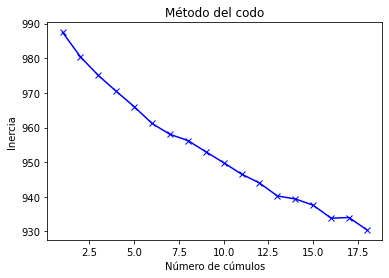

In [41]:
# list(zip(ks,k_inertias))

plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertias, 'bx-');

###  `[10 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [45]:
k = 3
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=3)

In [46]:
data['cluster'] = model.labels_
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,2
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,0
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,0
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,1
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,1
...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,1
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,1
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,1
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,0


###  `[15 pts]` Punto 4: Interpretación de los clusters

In [47]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroids = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    
    print(f"DOCUMENTOS MÁS REPRESENTATIVOS")
    for vecino in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]].review_body.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("********************************************")
    print()

Cluster # 0
Tiene 683 registros (68.30% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
juego perfecto producto si llegado buen mas día bonitos llegó tiempo precio foto regalo caja esperaba jugar solo llego mando 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** El producto en buen estado. Perfecto.

 *** El juego ha llegado rapido y en perfecto estado. El precio ha sido inmejorable.

 *** El juego en sí es increíble. A estas alturas de la generación poco más se puede decir salvo que es el simulador de conducción por excelencia, el mejor en su género en consolas. El pero viene por el envío de Amazon. El juego me lo envían sin precinto original, abierto, probablemente procedente de alguna devolución, cosa que no especifican en ningún momento. Además y para colmo, la caja vino con una de las pestañas rotas. Impresionante el mal gusto por parte de Amazon al enviar el producto de esta manera: Gracias a dios el disco está impoluto y el precio aún así mereció la pena, pero me tocará comprar algún juego de s

In [48]:
clusters = {0: 'VIDEO JUEGOS',
            1: "CALIDAD",
            2: 'JOYERÍA'}
           

data['nombres_clusters'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster,nombres_clusters
151,es_0701882,product_es_0619014,reviewer_es_0563994,2,"Por el precio que tiene te hace el apaño, ahor...",No está mal,es,jewelry,1,CALIDAD
397,es_0732639,product_es_0491220,reviewer_es_0876517,2,"Es muy bonita, pero no la mojes porque se oxida.",Bonita pero se oxida.,es,jewelry,0,VIDEO JUEGOS
133,es_0800283,product_es_0042199,reviewer_es_0818479,1,"El producto en sí es una maravilla, no has sen...",Calidad del producto mal por Amazon,es,video_games,0,VIDEO JUEGOS
649,es_0914819,product_es_0143141,reviewer_es_0554085,5,Geniales vienen con una buena tuerca para que ...,Ok,es,jewelry,0,VIDEO JUEGOS
797,es_0792734,product_es_0116956,reviewer_es_0784151,1,La cadena no está mal......el embalaje una ver...,Embalaje de vergüenza,es,jewelry,0,VIDEO JUEGOS


###  `[BONUS: 3 pts]` Visualización usando PCA

In [49]:
df_centroids = pd.DataFrame(centroids)
df_centroids['cluster'] = clusters.values()
df_centroids

,0,1,2,3,4,5,6,7,8,9,...,3657,3658,3659,3660,3661,3662,3663,3664,3665,cluster
0,6.628099e-04,-1.084202e-18,4.365440e-04,2.075371e-04,-1.626303e-19,1.192787e-03,9.842736e-04,2.551485e-04,5.066210e-04,8.736203e-04,...,1.079404e-03,2.075371e-04,2.411010e-04,-7.047314e-19,4.564960e-04,0.000666,3.965102e-04,2.836178e-03,2.042602e-03,VIDEO JUEGOS
1,2.498912e-03,7.616887e-03,5.421011e-20,-5.421011e-20,1.210332e-03,-5.421011e-19,-8.673617e-19,-1.084202e-19,0.000000e+00,4.336809e-19,...,4.336809e-19,-5.421011e-20,1.626303e-19,-1.084202e-19,1.626303e-19,0.001087,-2.710505e-19,1.476922e-03,-4.336809e-19,CALIDAD
2,-4.336809e-19,-2.168404e-19,1.084202e-19,5.421011e-20,1.631532e-03,2.168404e-19,-3.252607e-19,-5.421011e-20,5.421011e-20,4.336809e-19,...,6.505213e-19,5.421011e-20,8.131516e-20,2.737980e-03,1.626303e-19,0.003408,0.000000e+00,4.336809e-19,-4.336809e-19,JOYERÍA


In [50]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.nombres_clusters.values
result['texto'] = data.review_body.apply(lambda val: val[:140])

colorsIdx = {'VIDEO JUEGOS': 'blue',
             'CALIDAD': 'red',
             'JOYERÍA': 'orange'}
            

result['colores'] = result['cluster'].map(colorsIdx)


result.head()

,X,Y,cluster,texto,colores
0,0.486647,-0.322258,JOYERÍA,"Buen. Buena calidad, y buena presentación.",orange
1,-0.106857,-0.146933,VIDEO JUEGOS,"Un producto a perfecto, para salir de casa con...",blue
2,-0.071045,-0.028613,VIDEO JUEGOS,No funciona con Nintendo Switch. No hay forma ...,blue
3,0.031709,0.234630,CALIDAD,"Recomendado, los utilizo para pc y no me dan n...",red
4,0.016544,0.096602,CALIDAD,El cable funciona bien podria ser un poco mas ...,red


In [51]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Comparación

### `[BONUS 20 pts (validos para cualquier tarea)]` 
### Hacer predicción para estas dos frases de los dos modelos (clasificación y $k$-means)

In [52]:
# Resultados
Nuevo = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]

In [53]:
nuevo_trans = tfidf_vect.transform(nuevo)
[clusters[i] for i in model.predict(nuevo_trans)]

['VIDEO JUEGOS', 'JOYERÍA']

In [54]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

In [55]:
logreg = LogisticRegression(class_weight="balanced")

# Entrenar modelo
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [56]:
# Resultados
nuevo1 = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevos_trans = tfidf_vect.transform(nuevo1)
logreg.predict(nuevos_trans)

array(['video_games', 'jewelry'], dtype=object)

### `[5 pts]` Punto 5: Preguntas

- Según los resultados del $K$-Means, ¿cuál es la estructura de los datos?
- ¿Qué diferencia notó entre los resultados del taller pasado y este?
- ¿Alguna otra observación?

El modelo no supervisado nos mostro varios clusters lo cual en mi caso fue una sorpresa por la cantidad de patrones que puede generar, esperaba los mismo del taller pasado (Algo que fuera mas diciente)
El modelo K-Means al poder generar mas patrones que no se ven en el caso de los modelos supervisados, nos puede entregar categorias importantes que antes no se tenían en cuenta en el negocio